# BoomBike Sharing Assignment


# 1. Importing libraries

In [1]:
### Importing the packages to be used

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression

In [3]:
##### Importing Statsmodel.api for VIF

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


#### importing SciKit library for test-train splitting and Scaling
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# 2. Reading the dataset

In [4]:
### The instant column contains the index values, so making it the index

bike = pd.read_csv("E:/Upgrad course/Part II/Bike Sharing Assignment/day.csv",index_col='instant')

In [5]:
bike.shape

(730, 15)

In [6]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [9]:
bike.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Inferences by looking at the data:
 - There are no null values
 - There are 15 columns in total, 4 float, 11 int and 1 object type

# 3. Preparing the data


In [10]:
### Checking the column dteday to see if we can extract date, month and year

bike.dteday.describe()

count            730
unique           730
top       07-03-2018
freq               1
Name: dteday, dtype: object

## 3.1 Extracting date, month and year from the dteday column

In [11]:
### Extracting the date from the dteday column and checking the max and min values to see if there is any discrepency

bike["dteday"] = bike.dteday.apply(lambda x: int(x.split("-")[0]))

In [12]:
bike = bike.rename(columns={"dteday": "date"})

In [13]:
bike.date.describe()

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: date, dtype: float64

#### Inference:
- There is no discrepency in the data as min date is 1 and max is 31. It means all the values lie within it.


In [14]:
### No need to extract Month as mnth column is already present
### checking the max and min values to see if there is any discrepency


In [15]:
bike.mnth.describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: mnth, dtype: float64

#### Inference:
- There is no discrepency in the data as min month is 1 and max is 12. It means all the values lie within it.

### 3.1.1. Plotting the Avg Ride Count vs Date

In [16]:
date_dist = round((bike.groupby(by = "date").cnt.mean()/1000),2)

In [17]:
date_dist

date
1     4.32
2     4.39
3     4.65
4     4.68
5     4.55
6     4.53
7     4.40
8     4.28
9     4.50
10    4.65
11    4.63
12    4.55
13    4.64
14    4.68
15    4.82
16    4.58
17    4.93
18    4.52
19    4.60
20    4.78
21    4.36
22    4.12
23    4.44
24    4.32
25    4.37
26    4.43
27    4.28
28    4.41
29    4.27
30    4.54
31    4.54
Name: cnt, dtype: float64

In [18]:
### plotting a bar graph for easy visualisation of avg count vs Date

def bar_graph_plot_function(data, graph_title, x_axis_label, y_axis_label, data_label='horizontal', x_label_rotation=0, x_text=None):
    population_graph = sns.barplot(x=data.index, y=data.values)
    label_deviation_above_y_axis = data.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        population_graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label)       
    if x_text is None:
        population_graph.set_xticklabels(population_graph.get_xticklabels(), rotation=x_label_rotation)
    else:
        population_graph.set_xticklabels(x_text, rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()

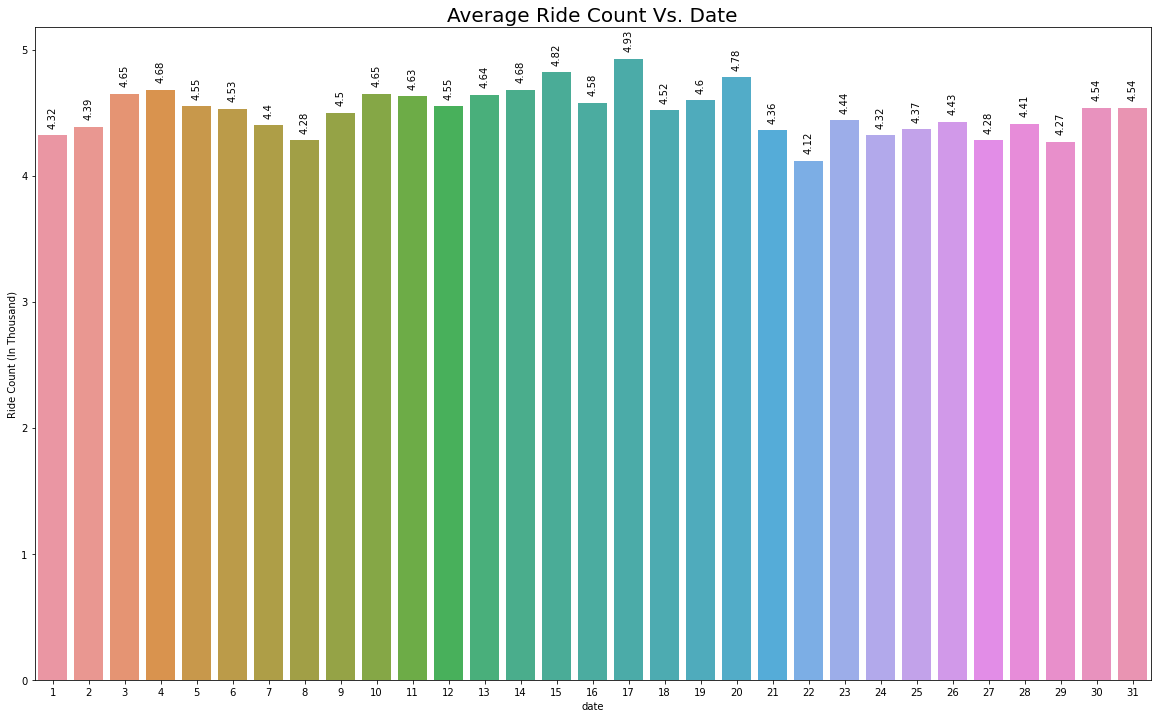

In [19]:
plt.figure(figsize = (20,12))

bar_graph_plot_function(data=date_dist, graph_title='Average Ride Count Vs. Date', x_axis_label='date',
                        y_axis_label='Ride Count (In Thousand)', data_label='vertical', x_label_rotation=0)

### Inferences:
- We do not see any significant changes in the counts as per the dates

### 3.1.2. Plotting month vs avg ride count

In [20]:
month_dist = round((bike.groupby(by = "mnth").cnt.mean()/1000),2)
month_dist

mnth
1     2.18
2     2.67
3     3.69
4     4.48
5     5.35
6     5.77
7     5.56
8     5.66
9     5.77
10    5.20
11    4.25
12    3.40
Name: cnt, dtype: float64

#### Importing datetime package to deal with datetime

In [21]:
import datetime
from scipy.stats import pearsonr

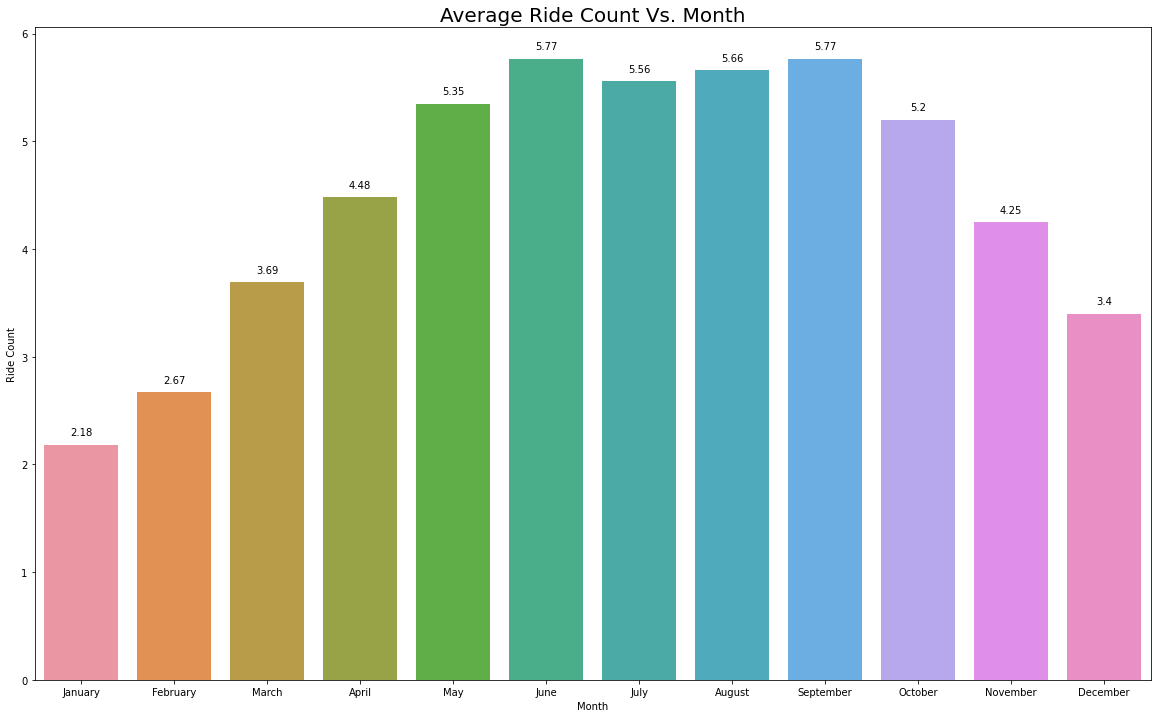

In [22]:
plt.figure(figsize = (20,12))

bar_graph_plot_function(data=month_dist, graph_title='Average Ride Count Vs. Month', x_axis_label='Month',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=[datetime.date(1900, i , 1).strftime('%B') for i in range(1, 13)])

### Inferences:
- We see that the ride counts increase between May to October i.e. during the fall and summer season

### 3.1.3. Plotting year vs avg ride count

In [23]:
year_dist = round((bike.groupby(by = "yr").cnt.mean()/1000),2)
year_dist

yr
0    3.41
1    5.61
Name: cnt, dtype: float64

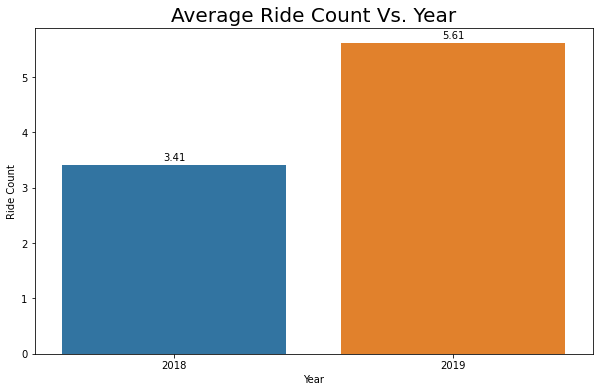

In [24]:
plt.figure(figsize = (10,6))

bar_graph_plot_function(data=year_dist, graph_title='Average Ride Count Vs. Year', x_axis_label='Year',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0,
                        x_text=['2018', '2019'])

### Inferences:
- We see that ride counts have increased in the year 2019 from 2018.

### 3.2. Plotting avg count vs Season

In [25]:
### Mapping the seasons as per number

bike.season = bike.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}) 

In [26]:
season_dist = round(bike.groupby(by = 'season').cnt.mean()/1000,2).sort_values() 

In [27]:
season_dist

season
Spring    2.61
Winter    4.73
Summer    4.99
Fall      5.64
Name: cnt, dtype: float64

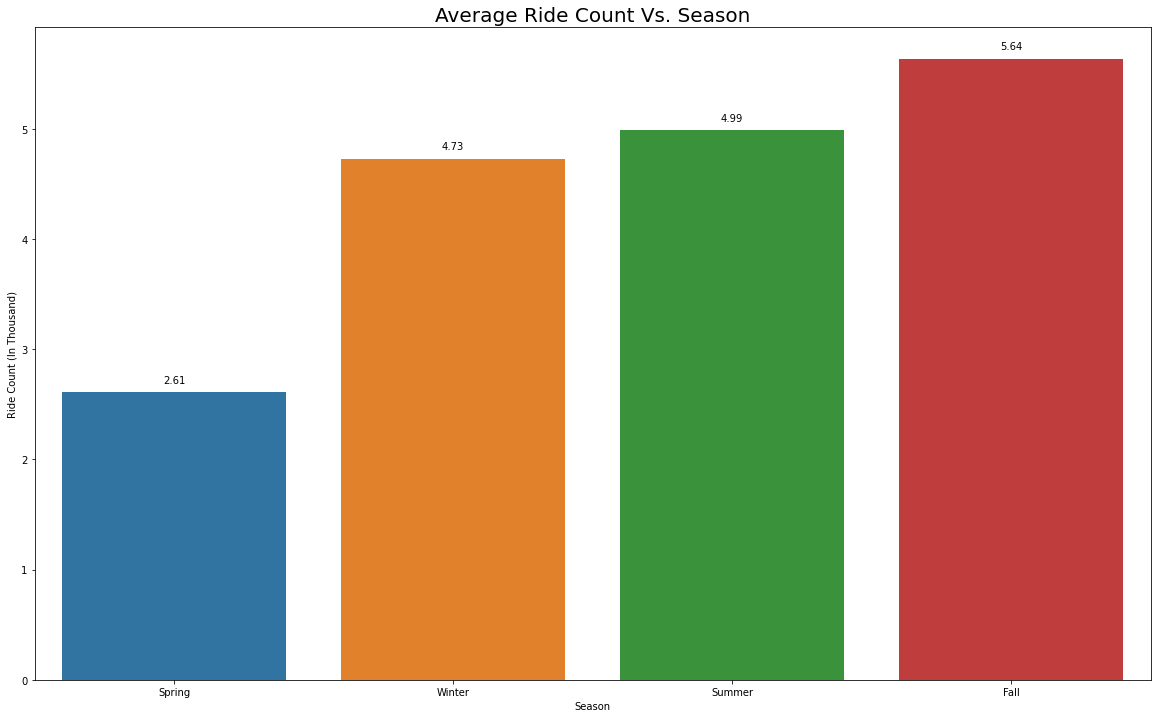

In [28]:
plt.figure(figsize = (20,12))

bar_graph_plot_function(data=season_dist, graph_title='Average Ride Count Vs. Season', x_axis_label='Season',
                        y_axis_label='Ride Count (In Thousand)', x_label_rotation=0)

### Inference:
-the Avg Rides is the lowest in Spring season.

In [29]:
bike.mnth = bike.mnth.apply(lambda x: datetime.date(1900, x , 1).strftime('%B'))

In [30]:
bike.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,1,Spring,0,January,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2,Spring,0,January,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,3,Spring,0,January,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,4,Spring,0,January,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,5,Spring,0,January,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 3.3. Plotting holiday vs avg cnt

In [31]:
bike.holiday.describe()

count    730.000000
mean       0.028767
std        0.167266
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64

#### Inferences:
- Holiday is divided into 2 categories, i.e., 1 and 0. We dont have to work on them and can directly use them


In [32]:
holiday_dist = round(bike.groupby(by = 'holiday').cnt.mean()/1000,2)

holiday_dist

holiday
0    4.53
1    3.74
Name: cnt, dtype: float64

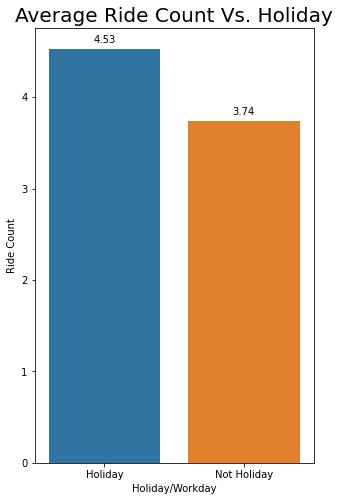

In [33]:
plt.figure(figsize = (5,8))

bar_graph_plot_function(data=holiday_dist, graph_title='Average Ride Count Vs. Holiday',  x_axis_label='Holiday/Workday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Holiday', 'Not Holiday'])

#### Inferences:
- We see that there is an increase in ridership on holidays


### 3.4. Plotting Weekday ve Avg cnt

In [34]:
bike.weekday.describe()

count    730.000000
mean       2.995890
std        2.000339
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64

In [35]:
bike.groupby(by = 'weekday').weekday.count()

weekday
0    104
1    105
2    105
3    104
4    104
5    104
6    104
Name: weekday, dtype: int64

#### Inferences:
- the ridership cnt is distributed all across the week with values 0 to 6. 0 being a sunday and 6 being Saturday.

In [36]:
weekday_dist = round(bike.groupby(by = 'weekday').cnt.mean()/1000,2)

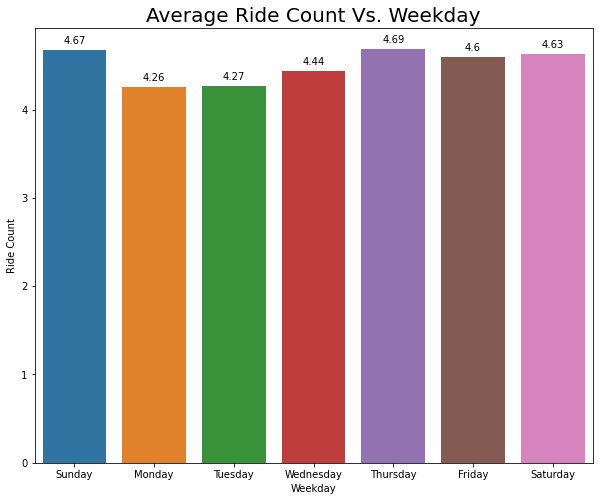

In [37]:
plt.figure(figsize = (10,8))

bar_graph_plot_function(data=weekday_dist, graph_title='Average Ride Count Vs. Weekday', x_axis_label='Weekday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

In [38]:
####### Mapping the days to the data for weekdays

bike['weekday'] = bike.weekday.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday',
                                            5: 'friday', 6: 'saturday'})

In [39]:
bike.groupby(by='weekday').weekday.count()

weekday
friday       104
monday       105
saturday     104
sunday       104
thursday     104
tuesday      105
wednesday    104
Name: weekday, dtype: int64

### 3.5. workingday vs avg cnt

In [40]:
bike.workingday.describe()

count    730.000000
mean       0.690411
std        0.462641
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: workingday, dtype: float64

In [41]:
bike.groupby(by='workingday').workingday.count()

workingday
0    226
1    504
Name: workingday, dtype: int64

#### Inferences:
- 0 is a working day and 1 is a holiday. We see from the data that ridership is more on a holiday

In [42]:
workingday_dist = round(bike.groupby('workingday').cnt.mean()/1000,2)
workingday_dist

workingday
0    4.59
1    4.47
Name: cnt, dtype: float64

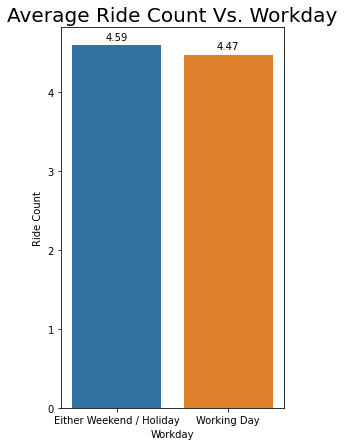

In [43]:
plt.figure(figsize = (4,7))
bar_graph_plot_function(data=workingday_dist, graph_title='Average Ride Count Vs. Workday', x_axis_label='Workday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Either Weekend / Holiday', 'Working Day'])

In [44]:
bike.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,1,Spring,0,January,0,monday,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2,Spring,0,January,0,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,3,Spring,0,January,0,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,4,Spring,0,January,0,thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,5,Spring,0,January,0,friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 3.6. Weather sit vs Avg cnt

In [45]:
bike.weathersit.describe()

count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

#### Weather situation is mapped such as:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#### Replacing the numbers with the following:
- 1: Clear
- 2: Mist
- 3: Light

#### There are no values for 4, hence we are not mapping it to anything

In [46]:
bike['weathersit'] = bike['weathersit'].map({1:'clear', 2:'mist', 3:'light', 4:'heavy'})

In [47]:
bike.groupby('weathersit').weathersit.count().sort_values(ascending=False)


weathersit
clear    463
mist     246
light     21
Name: weathersit, dtype: int64

In [48]:
weathersit_dist = round(bike.groupby('weathersit').cnt.mean()/1000,2)
weathersit_dist

weathersit
clear    4.88
light    1.80
mist     4.04
Name: cnt, dtype: float64

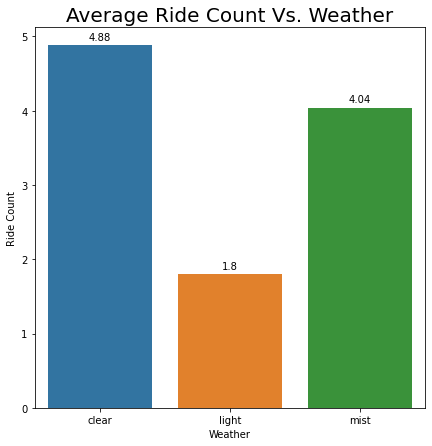

In [49]:
plt.figure(figsize = (7,7))
bar_graph_plot_function(data=weathersit_dist, graph_title='Average Ride Count Vs. Weather', x_axis_label='Weather',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0)

### 3.7. Temperature and Adjusted Temperature

In [50]:
headers = ['Temperature', 'Adjusted Temperature']
pd.DataFrame(np.corrcoef(bike['temp'], bike["atemp"]), index=headers, columns=headers)   

,Temperature,Adjusted Temperature
Temperature,1.000000,0.991696
Adjusted Temperature,0.991696,1.000000


#### Inference: We see that Temperature and Adjusted Temperature are highly correlated with a coeff of 0.9917. Hence we decide to drop the column


In [51]:
bike = bike.drop(columns=['atemp'])

In [52]:
bike.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,
1,1,Spring,0,January,0,monday,1,mist,14.110847,80.5833,10.749882,331,654,985
2,2,Spring,0,January,0,tuesday,1,mist,14.902598,69.6087,16.652113,131,670,801
3,3,Spring,0,January,0,wednesday,1,clear,8.050924,43.7273,16.636703,120,1229,1349
4,4,Spring,0,January,0,thursday,1,clear,8.200000,59.0435,10.739832,108,1454,1562
5,5,Spring,0,January,0,friday,1,clear,9.305237,43.6957,12.522300,82,1518,1600


In [53]:
bike.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

Text(0.5, 0, 'Temperature')

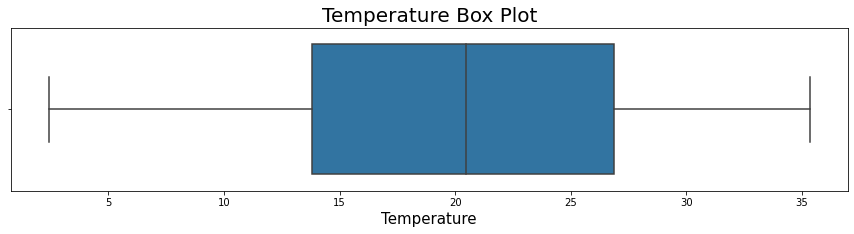

In [54]:
plt.figure(figsize=(15, 3))
sns.boxplot(data=bike, x='temp')
plt.title('Temperature Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Temperature', fontdict={'fontsize': 15})

#### The temperature range seems to be valid. So, we are not doing any cleaning in the column

### 3.8. Humidity column

In [55]:
bike.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

Text(0.5, 0, 'Humidity')

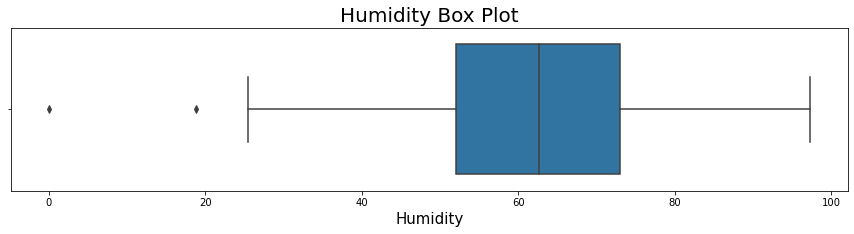

In [56]:
plt.figure(figsize=(15, 3))
sns.boxplot(data=bike, x='hum')
plt.title('Humidity Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Humidity', fontdict={'fontsize': 15})

#### On checking the outliers, we see that there is a single point where humidity is ), which is practically impossible

#### We are checking for those instance and will impute them, if required

In [57]:
bike[bike.hum < 10]

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,
69,10,Spring,0,March,0,saturday,0,light,15.952731,0.0,17.545759,46,577,623


#### There is only 1 such instance and hence we can directly impute the value with the mean

In [58]:
mean_value = bike.hum.mean()
mean_value

62.76517493150685

In [59]:
bike.at[int(bike[bike['hum'] == 0.0].hum.index.values), "hum"] = mean_value


#### Checking if the data has been imputed or not


In [60]:
bike[bike.hum < 10]

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,


#### The data has been imputed with the mean value

### 3.9. Windspeed

In [61]:
bike.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

#### Inference: The data in windspeed seems to be okay

### 3.10. Casual, Registered and cnt column

#### We dont have any need for casual and registered users data. They can be deleted. We are only dealing with the final counts

In [62]:
bike = bike.drop(columns=['casual', 'registered'])

In [63]:
bike.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,Spring,0,January,0,monday,1,mist,14.110847,80.5833,10.749882,985
2,2,Spring,0,January,0,tuesday,1,mist,14.902598,69.6087,16.652113,801
3,3,Spring,0,January,0,wednesday,1,clear,8.050924,43.7273,16.636703,1349
4,4,Spring,0,January,0,thursday,1,clear,8.200000,59.0435,10.739832,1562
5,5,Spring,0,January,0,friday,1,clear,9.305237,43.6957,12.522300,1600


## 3.11. Pair plot

#### We are checking the scatter plots for the raw data to check for correlations

In [112]:
pair_plot_data = pd.read_csv("E:/Upgrad course/Part II/Bike Sharing Assignment/day.csv",index_col='instant')

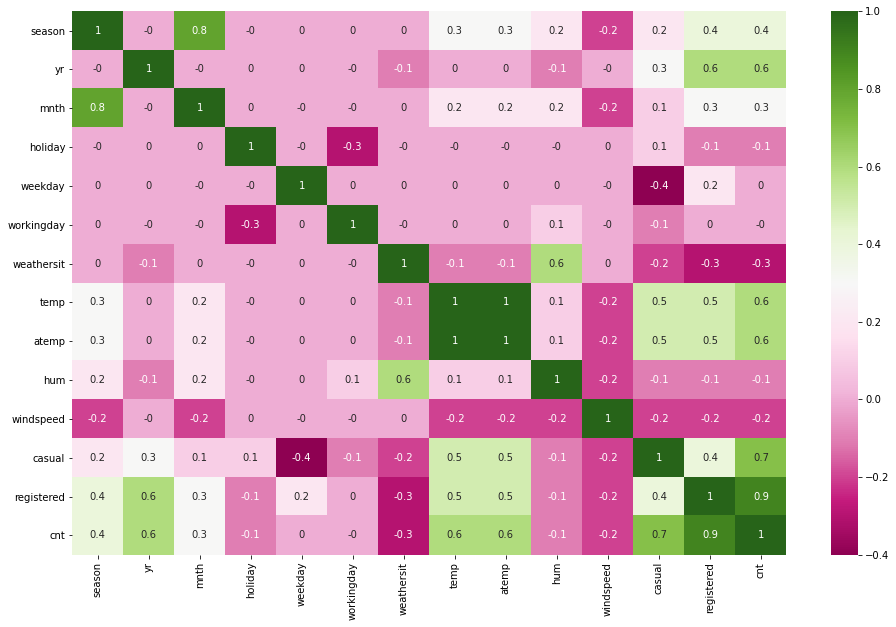

In [115]:
#### Using the raw data to check for correlation

plt.figure(figsize=(16, 10))
sns.heatmap(round(pair_plot_data.corr(),1),annot= True, cmap = "PiYG")

##### Doing the basic mapping operations and deleting unwanted columns of the base data

In [65]:
pair_plot_data['dteday'] = pair_plot_data['dteday'].apply(lambda x: int(x.split('-')[0]))
pair_plot_data = pair_plot_data.rename(columns={"dteday": "date"})
pair_plot_data['yr'] = pair_plot_data['yr'].map({0: 2018, 1:2019})
pair_plot_data = pair_plot_data.drop(columns=['atemp', 'casual', 'registered'])
pair_plot_data.at[int(pair_plot_data[pair_plot_data['hum'] == 0.0].hum.index.values), "hum"] = mean_value

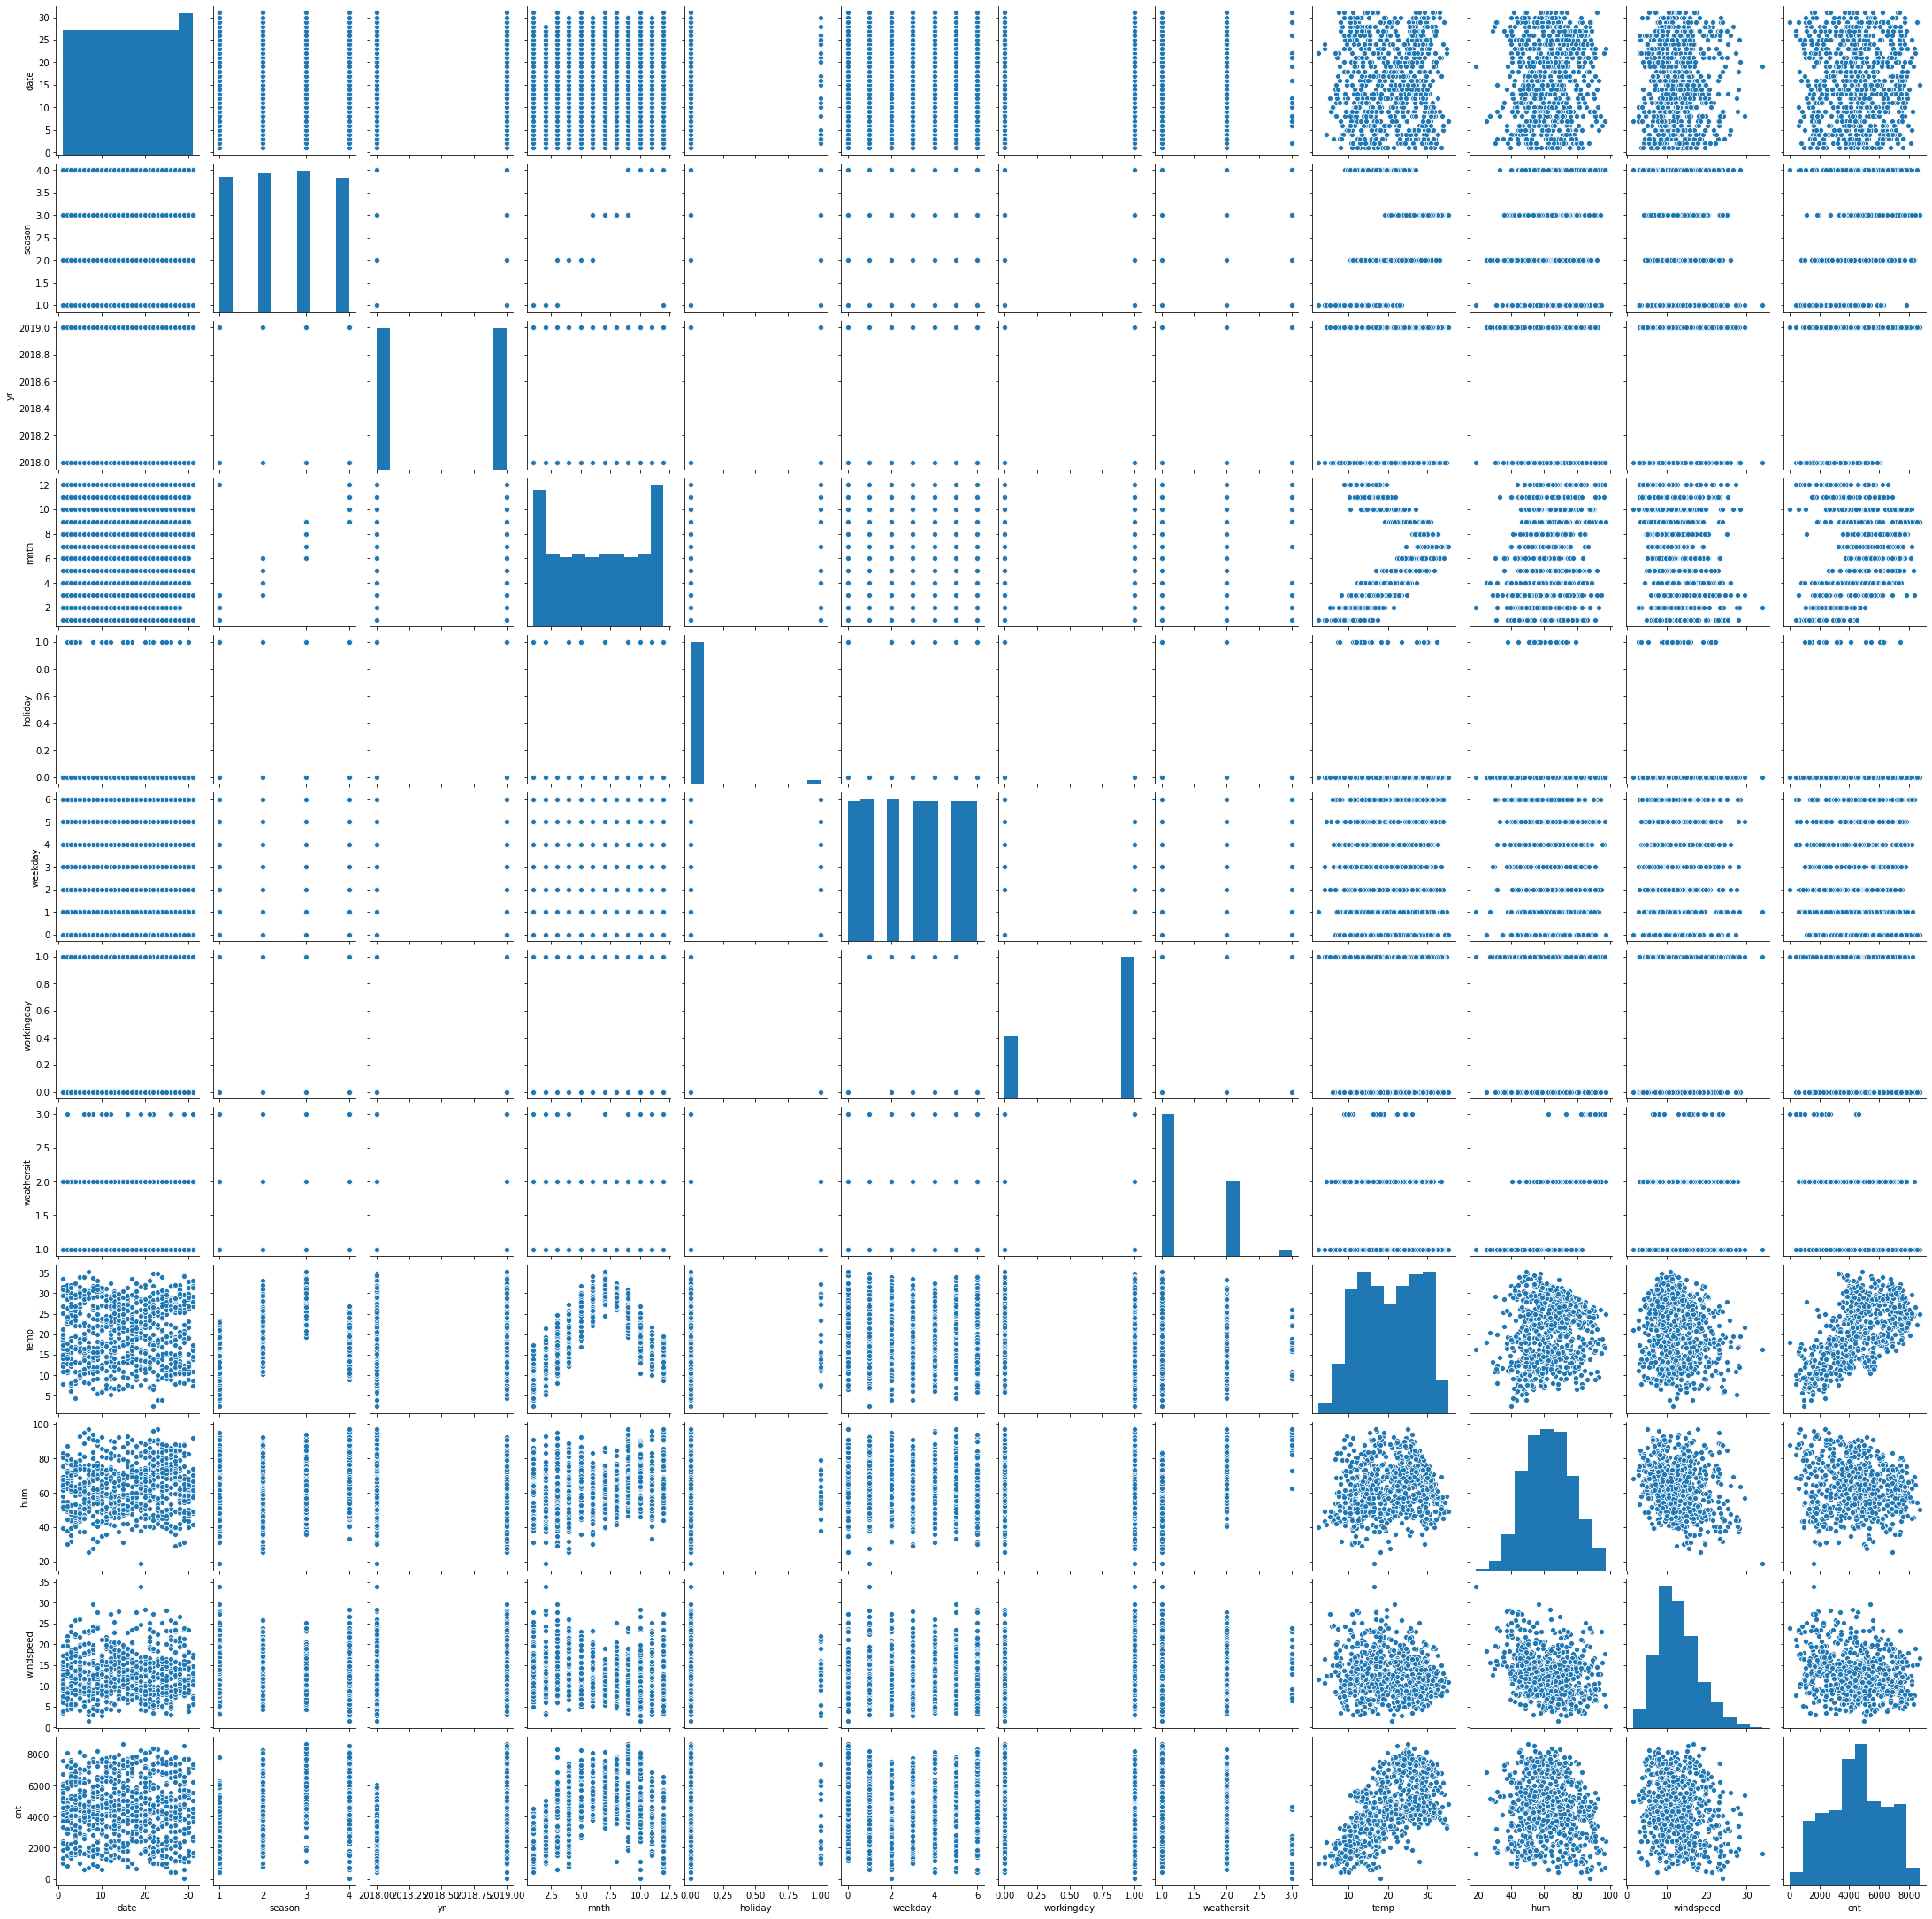

In [66]:
sns.pairplot(pair_plot_data)

**Following are the few assumptions that can hold up from the pairplot with respect to Count as Target Variable:**
- Date Column seems to be scattered evenly across all the points. Unable to make out any pattern when predicting Ride Count from the Date column alone.
- Ride Count Seems to be in maximum in Fall (Autumn) followed by Summer, Spring & Winter respectively.
- Ride Count has increased drastically in 2019 as compared to 2018
- Ride Count seems to increase between May to October which are comparatively Fall(Autumn) & Summer Season in US
- Ride Count is lesser on Holidays as compared to other days.
- Working Day / Non-Working Day shows almost similar behaviour (after just visualising the data)
- Ride Count is more on Clear & Misty Days as compared to Light Snow / Rainfall
- Ride Count seems to be very much lienarly dependent on Temperature
- Humidity & windspeed does not indicate any specific behaviour on just visualising the data.

## 4. Data Transformation

#### For the belo columns, we need to create dummy variables
- mnth
- season
- weekday
- weathersit 

In [67]:
dummy_variable_cols = ['mnth','season','weekday','weathersit']

In [68]:
status = pd.get_dummies(bike[dummy_variable_cols],drop_first = True)


#### Appending the dummy columns and deleting the original columns from the bike dataset

In [69]:
bike = pd.concat([bike, status], axis=1)

In [70]:
bike = bike.drop(columns=dummy_variable_cols)

In [71]:
bike.head()

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,...,season_Summer,season_Winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,14.110847,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2,0,0,1,14.902598,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,1
3,3,0,0,1,8.050924,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,0,0,1,8.200000,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
5,5,0,0,1,9.305237,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5. Data Splitting


In [72]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bike, train_size = 0.7, random_state =100)

In [73]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               730 non-null    int64  
 1   yr                 730 non-null    int64  
 2   holiday            730 non-null    int64  
 3   workingday         730 non-null    int64  
 4   temp               730 non-null    float64
 5   hum                730 non-null    float64
 6   windspeed          730 non-null    float64
 7   cnt                730 non-null    int64  
 8   mnth_August        730 non-null    uint8  
 9   mnth_December      730 non-null    uint8  
 10  mnth_February      730 non-null    uint8  
 11  mnth_January       730 non-null    uint8  
 12  mnth_July          730 non-null    uint8  
 13  mnth_June          730 non-null    uint8  
 14  mnth_March         730 non-null    uint8  
 15  mnth_May           730 non-null    uint8  
 16  mnth_November      730 non

In [74]:
df_train.shape

(510, 30)

In [75]:
df_test.shape

(220, 30)

## 6. Data Transformation (Normalization/Standardization)

### Scaling the numerical variables

In [76]:
num_variables = ['date','temp','hum','windspeed','cnt']

In [77]:
scaler = MinMaxScaler() 

In [78]:
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])
df_train.head()

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,...,season_Summer,season_Winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,
577,1.000000,1,0,1,0.815169,0.659744,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
427,0.066667,1,0,0,0.442393,0.553780,0.255342,0.465255,0,0,...,0,0,0,0,1,0,0,0,0,1
729,0.966667,1,0,1,0.245101,0.377528,0.663106,0.204096,0,1,...,0,0,1,0,0,0,0,0,0,0
483,0.900000,1,0,0,0.395666,0.385516,0.188475,0.482973,0,0,...,1,0,0,0,1,0,0,0,0,1
112,0.700000,0,0,0,0.345824,0.692225,0.380981,0.191095,0,0,...,1,0,0,0,1,0,0,0,0,1


## 7. Manual analysis of variables using the Correlation table

In [79]:
##### Finding the correlation matrix of the training data set


df_train.corr()

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,...,season_Summer,season_Winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
date,1.000000,0.006886,0.000422,0.000509,0.023579,0.010013,0.011404,0.020019,0.028387,-0.031279,...,0.006326,0.024198,-0.027258,0.010444,-0.008609,0.020609,-0.005622,0.021983,1.449185e-02,-0.074687
yr,0.006886,1.000000,-0.014980,-0.003005,0.108054,-0.094777,-0.000439,0.591433,0.054774,-0.040049,...,0.018294,-0.027174,-0.033817,-0.017733,0.016537,0.032785,0.026024,0.010995,-6.076399e-02,-0.011388
holiday,0.000422,-0.014980,1.000000,-0.254149,-0.066405,-0.031249,0.017458,-0.095948,-0.052728,-0.004302,...,-0.063798,0.051582,-0.069242,-0.025291,-0.028355,-0.066102,0.034971,0.190636,-2.815377e-02,-0.038895
workingday,0.000509,-0.003005,-0.254149,1.000000,-0.007143,0.007666,-0.002071,-0.009071,-0.012875,-0.025020,...,0.033299,0.033299,0.272446,-0.605864,-0.626783,0.260091,0.234321,0.163120,8.289412e-03,-0.066206
temp,0.023579,0.108054,-0.066405,-0.007143,1.000000,0.153413,-0.187281,0.645048,0.387176,-0.273091,...,0.126057,-0.234200,-0.038042,0.024972,0.006540,0.074647,-0.002284,-0.044303,-3.622709e-02,-0.089452
hum,0.010013,-0.094777,-0.031249,0.007666,0.153413,1.000000,-0.264602,-0.077578,0.051122,0.056083,...,-0.019565,0.172403,-0.035257,0.025571,-0.031800,-0.062109,0.030129,0.025388,3.009162e-01,0.482661
windspeed,0.011404,-0.000439,0.017458,-0.002071,-0.187281,-0.264602,1.000000,-0.253038,-0.111460,-0.061179,...,0.110441,-0.090740,0.035097,-0.016545,0.018007,-0.021779,0.035326,-0.055798,8.677832e-02,-0.029892
cnt,0.020019,0.591433,-0.095948,-0.009071,0.645048,-0.077578,-0.253038,1.000000,0.227578,-0.143546,...,0.140259,0.025945,-0.071013,0.012712,0.031474,0.110734,-0.018672,-0.020949,-2.266784e-01,-0.169715
mnth_August,0.028387,0.054774,-0.052728,-0.012875,0.387176,0.051122,-0.111460,0.227578,1.000000,-0.098929,...,-0.186753,-0.186753,0.007536,0.032882,0.005308,0.018738,-0.064591,0.007209,-5.675323e-02,0.015258
mnth_December,-0.031279,-0.040049,-0.004302,-0.025020,-0.273091,0.056083,-0.061179,-0.143546,-0.098929,1.000000,...,-0.173818,0.317031,0.026120,-0.011872,0.043024,-0.083721,-0.011302,0.003762,-1.105587e-02,0.017231


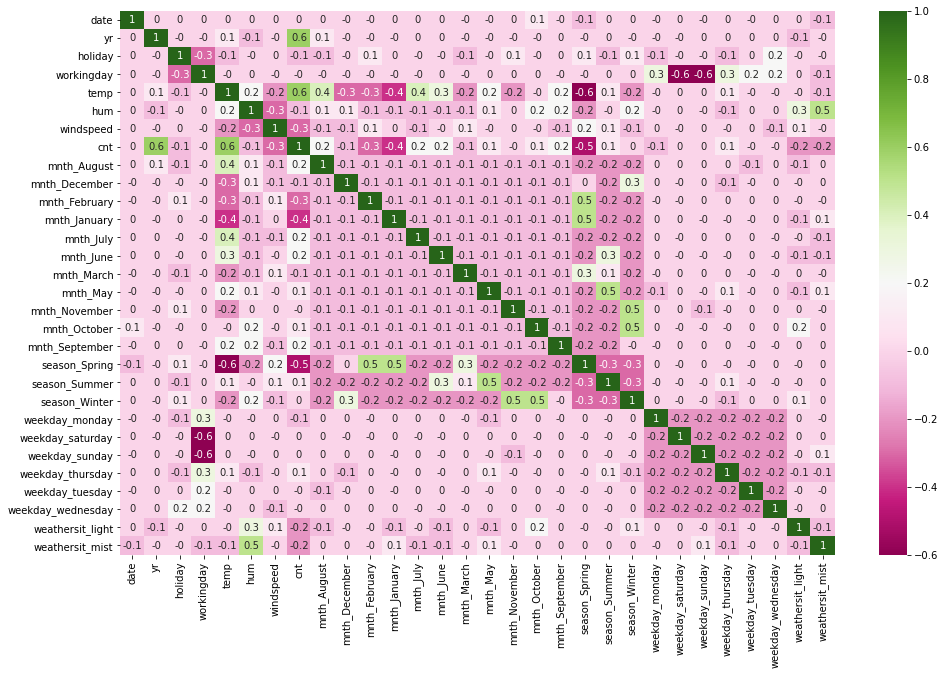

In [80]:
##### Making a heatmap of the correlation matrix for easier visualization
plt.figure(figsize=(16, 10))
sns.heatmap(round(df_train.corr(),1),annot= True, cmap = "PiYG")

#### Inferences:
- We see that there are no variables that are strongly correlated. We can use VIF and check multicollinearity while creating the models

## 8. Defining the feature and target variable for Iterative Modelling Process

### 8.1. Fixing Trained Target Variable

In [81]:
y_train = df_train.pop('cnt')

### 8.2. Fixing Trained Feature Variables

In [82]:
X_train = df_train

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 577 to 521
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               510 non-null    float64
 1   yr                 510 non-null    int64  
 2   holiday            510 non-null    int64  
 3   workingday         510 non-null    int64  
 4   temp               510 non-null    float64
 5   hum                510 non-null    float64
 6   windspeed          510 non-null    float64
 7   mnth_August        510 non-null    uint8  
 8   mnth_December      510 non-null    uint8  
 9   mnth_February      510 non-null    uint8  
 10  mnth_January       510 non-null    uint8  
 11  mnth_July          510 non-null    uint8  
 12  mnth_June          510 non-null    uint8  
 13  mnth_March         510 non-null    uint8  
 14  mnth_May           510 non-null    uint8  
 15  mnth_November      510 non-null    uint8  
 16  mnth_October       510 n

### Making a function for VIF

In [83]:
def fetch_vif_df(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [84]:
X_train.head()

,date,yr,holiday,workingday,temp,hum,windspeed,mnth_August,mnth_December,mnth_February,...,season_Summer,season_Winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,
577,1.000000,1,0,1,0.815169,0.659744,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
427,0.066667,1,0,0,0.442393,0.553780,0.255342,0,0,0,...,0,0,0,0,1,0,0,0,0,1
729,0.966667,1,0,1,0.245101,0.377528,0.663106,0,1,0,...,0,0,1,0,0,0,0,0,0,0
483,0.900000,1,0,0,0.395666,0.385516,0.188475,0,0,0,...,1,0,0,0,1,0,0,0,0,1
112,0.700000,0,0,0,0.345824,0.692225,0.380981,0,0,0,...,1,0,0,0,1,0,0,0,0,1


## 9. Iterative Modelling Process

### 9.1 Using RFE to remove unimportant variables

##### There are around 30 variables which need to be checked. Looking through all of them, adding and removing each and every variable is impossible. Hence we use Recursive Feature Elimination to remove the unimportant variables

In [85]:
lm = LinearRegression()
lm.fit(X_train, y_train)

######  Using RFE to find the top 15 features and decide which to be removed

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [86]:
#### Showing the RFE as a data frame

rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
28,weathersit_mist,True,1
18,season_Spring,True,1
17,mnth_September,True,1
15,mnth_November,True,1
27,weathersit_light,True,1
11,mnth_July,True,1
19,season_Summer,True,1
8,mnth_December,True,1
10,mnth_January,True,1
6,windspeed,True,1


#### We have received the Top 15 features but we are trying to check manually as well


### 9.2. Model Building-1 

In [87]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]


X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.5
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          7.47e-189
Time:                        20:23:48   Log-Likelihood:                 514.28
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     494   BIC:                            -928.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2900      0.033      8.713      0.000       0.225       0.355
yr                   0.2298      0.008     28.358      0.000       0.214       0.246
holiday             -0.0911      0.026     -3.560      0.000      -0.141      -0.041
temp                 0.4863      0.037     13.031      0.000       0.413       0.560
hum                 -0.1401      0.032     -4.312      0.000      -0.204      -0.076
windspeed           -0.1910      0.026     -7.365      0.000      -0.242      -0.140
mnth_December       -0.0350      0.018     -1.994      0.047      -0.069      -0.001
mnth_January        -0.0440      0.018     -2.425      0.016      -0.080      -0.008
mnth_July           -0.0559      0.018     -3.062      0.002      -0.092      -0.020
mnth_November       -0.0383      0.019     -2.035      0.042      -0.075      -0.001
mnth_September       0.0758      0.017      4.484      0.000       0.043       0.109
season_Spring       -0.0584      0.021     -2.739      0.006      -0.100      -0.017
season_Summer        0.0432      0.015      2.814      0.005       0.013       0.073
season_Winter        0.1031      0.018      5.705      0.000       0.068       0.139
weathersit_light    -0.2355      0.027     -8.566      0.000      -0.290      -0.182
weathersit_mist     -0.0524      0.011     -4.898      0.000      -0.073      -0.031
==============================================================================
Omnibus:                       67.361   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.781
Skew:                          -0.690   Prob(JB):                     7.41e-36
Kurtosis:                       5.389   Cond. No.                         20.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,hum,21.37
1,temp,14.27
2,windspeed,4.86
3,season_Spring,3.84
4,season_Winter,3.73
5,season_Summer,2.60
6,weathersit_mist,2.49
7,yr,2.10
8,mnth_November,1.83
9,mnth_January,1.71


#### Inferences:
- The VIF of 'hum' and 'temp' is too high. We will drop 'hum' in the next model and check
- The p values are under control

### 9.2. Model Building Process - 2

#### Dropping the column 'hum' and making a model

In [89]:
### Dropping the column hum and trying the model

col = col.drop(['hum'])
X_train_rfe = X_train[col]

X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          4.75e-186
Time:                        20:23:48   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2450      0.032      7.618      0.000       0.182       0.308
yr                   0.2345      0.008     28.687      0.000       0.218       0.251
holiday             -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp                 0.4387      0.036     12.093      0.000       0.367       0.510
windspeed           -0.1585      0.025     -6.276      0.000      -0.208      -0.109
mnth_December       -0.0428      0.018     -2.413      0.016      -0.078      -0.008
mnth_January        -0.0500      0.018     -2.719      0.007      -0.086      -0.014
mnth_July           -0.0500      0.019     -2.703      0.007      -0.086      -0.014
mnth_November       -0.0395      0.019     -2.064      0.040      -0.077      -0.002
mnth_September       0.0687      0.017      4.015      0.000       0.035       0.102
season_Spring       -0.0713      0.021     -3.314      0.001      -0.113      -0.029
season_Summer        0.0349      0.015      2.251      0.025       0.004       0.065
season_Winter        0.0869      0.018      4.831      0.000       0.052       0.122
weathersit_light    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
weathersit_mist     -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,temp,5.17
1,windspeed,4.67
2,season_Winter,2.95
3,season_Spring,2.89
4,season_Summer,2.24
5,yr,2.07
6,mnth_November,1.81
7,mnth_January,1.66
8,mnth_July,1.59
9,weathersit_mist,1.57


#### Inference 
- The VIF of temp is too high. Dropping the temp column and remodelling
- The p values are under control 

### 9.3. Model Building Process - 3

In [91]:
col = col.drop(['temp'])
X_train_rfe = X_train[col]

X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.9
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.82e-159
Time:                        20:23:49   Log-Likelihood:                 438.84
No. Observations:                 510   AIC:                            -849.7
Df Residuals:                     496   BIC:                            -790.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5954      0.016     37.460      0.000       0.564       0.627
yr                   0.2457      0.009     26.616      0.000       0.228       0.264
holiday             -0.0855      0.030     -2.887      0.004      -0.144      -0.027
windspeed           -0.1902      0.029     -6.662      0.000      -0.246      -0.134
mnth_December       -0.1086      0.019     -5.660      0.000      -0.146      -0.071
mnth_January        -0.1202      0.020     -6.056      0.000      -0.159      -0.081
mnth_July           -0.0182      0.021     -0.875      0.382      -0.059       0.023
mnth_November       -0.0995      0.021     -4.731      0.000      -0.141      -0.058
mnth_September       0.0534      0.019      2.750      0.006       0.015       0.092
season_Spring       -0.2503      0.018    -14.125      0.000      -0.285      -0.216
season_Summer       -0.0497      0.016     -3.160      0.002      -0.081      -0.019
season_Winter       -0.0231      0.018     -1.307      0.192      -0.058       0.012
weathersit_light    -0.3117      0.028    -11.150      0.000      -0.367      -0.257
weathersit_mist     -0.0869      0.010     -8.800      0.000      -0.106      -0.068
==============================================================================
Omnibus:                       56.274   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.272
Skew:                          -0.588   Prob(JB):                     1.89e-29
Kurtosis:                       5.200   Cond. No.                         9.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,windspeed,3.89
1,season_Spring,2.89
2,season_Winter,2.85
3,season_Summer,2.02
4,yr,1.83
5,mnth_November,1.80
6,mnth_January,1.64
7,weathersit_mist,1.53
8,mnth_December,1.46
9,mnth_July,1.20


### Inference
- Herre we notice that the VIF values are under control but the p values for mnth_july and season_winter are more than acceptable limit. Hence we start with dropping the column with highest p value, i.e., mnth_July

### 9.4. Model Building Process - 4

In [93]:
#### Dropping the column mnth_July

col = col.drop(['mnth_July'])
X_train_rfe = X_train[col]

X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     157.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          2.08e-160
Time:                        20:23:49   Log-Likelihood:                 438.45
No. Observations:                 510   AIC:                            -850.9
Df Residuals:                     497   BIC:                            -795.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5886      0.014     42.474      0.000       0.561       0.616
yr                   0.2458      0.009     26.633      0.000       0.228       0.264
holiday             -0.0852      0.030     -2.877      0.004      -0.143      -0.027
windspeed           -0.1901      0.029     -6.659      0.000      -0.246      -0.134
mnth_December       -0.1081      0.019     -5.635      0.000      -0.146      -0.070
mnth_January        -0.1201      0.020     -6.057      0.000      -0.159      -0.081
mnth_November       -0.0987      0.021     -4.699      0.000      -0.140      -0.057
mnth_September       0.0586      0.018      3.172      0.002       0.022       0.095
season_Spring       -0.2439      0.016    -15.125      0.000      -0.276      -0.212
season_Summer       -0.0432      0.014     -3.116      0.002      -0.070      -0.016
season_Winter       -0.0173      0.016     -1.058      0.290      -0.050       0.015
weathersit_light    -0.3118      0.028    -11.156      0.000      -0.367      -0.257
weathersit_mist     -0.0863      0.010     -8.762      0.000      -0.106      -0.067
==============================================================================
Omnibus:                       56.410   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.512
Skew:                          -0.592   Prob(JB):                     2.77e-29
Kurtosis:                       5.188   Cond. No.                         8.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
#### Finding the VIF coefficients

fetch_vif_df(X_train_rfe)

,Features,VIF
0,windspeed,3.52
1,season_Winter,2.75
2,season_Spring,2.71
3,season_Summer,1.87
4,mnth_November,1.80
5,yr,1.77
6,mnth_January,1.64
7,weathersit_mist,1.52
8,mnth_December,1.46
9,mnth_September,1.16


#### Inference:
- The p value for season_Winter column is still unacceptable. So we will drop the feature and rebuild the model

### 9.5. Model Building Process - 5

In [95]:
#### Dropping the column season_Winter

col = col.drop(['season_Winter'])
X_train_rfe = X_train[col]

X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     171.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          2.71e-161
Time:                        20:23:49   Log-Likelihood:                 437.88
No. Observations:                 510   AIC:                            -851.8
Df Residuals:                     498   BIC:                            -800.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5834      0.013     44.987      0.000       0.558       0.609
yr                   0.2459      0.009     26.646      0.000       0.228       0.264
holiday             -0.0854      0.030     -2.883      0.004      -0.144      -0.027
windspeed           -0.1910      0.029     -6.694      0.000      -0.247      -0.135
mnth_December       -0.1166      0.017     -6.689      0.000      -0.151      -0.082
mnth_January        -0.1216      0.020     -6.143      0.000      -0.160      -0.083
mnth_November       -0.1101      0.018     -6.120      0.000      -0.145      -0.075
mnth_September       0.0607      0.018      3.304      0.001       0.025       0.097
season_Spring       -0.2367      0.015    -16.212      0.000      -0.265      -0.208
season_Summer       -0.0374      0.013     -2.937      0.003      -0.062      -0.012
weathersit_light    -0.3155      0.028    -11.374      0.000      -0.370      -0.261
weathersit_mist     -0.0872      0.010     -8.883      0.000      -0.106      -0.068
==============================================================================
Omnibus:                       60.252   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.320
Skew:                          -0.619   Prob(JB):                     2.78e-32
Kurtosis:                       5.303   Cond. No.                         8.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
#### Finding the VIF coefficients

fetch_vif_df(X_train_rfe)

,Features,VIF
0,windspeed,3.23
1,season_Spring,2.37
2,yr,1.74
3,season_Summer,1.70
4,mnth_January,1.62
5,weathersit_mist,1.48
6,mnth_November,1.23
7,mnth_September,1.16
8,mnth_December,1.13
9,weathersit_light,1.07


#### Inferences
- In this model, the p values and the VIF coefficients are in control. So, we are fixing the feature for our model.

## 10. Proof of Linear Regression Assumption

### 10.1. Assumption of Normally Distributed Error Terms

In [97]:
y_train_pred = lr_model.predict(X_train_sm)

In [98]:
y_train_pred

instant
577    0.778775
427    0.456710
729    0.349454
483    0.668760
112    0.386045
         ...   
579    0.793589
54     0.325474
351    0.297159
80     0.357598
521    0.636067
Length: 510, dtype: float64

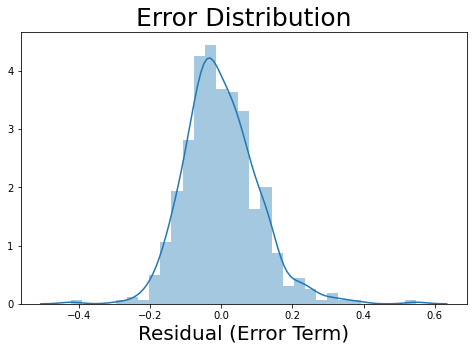

In [99]:
plt.figure(figsize = (8,5))

residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

### 10.2. Assumption of Error Terms being Independent

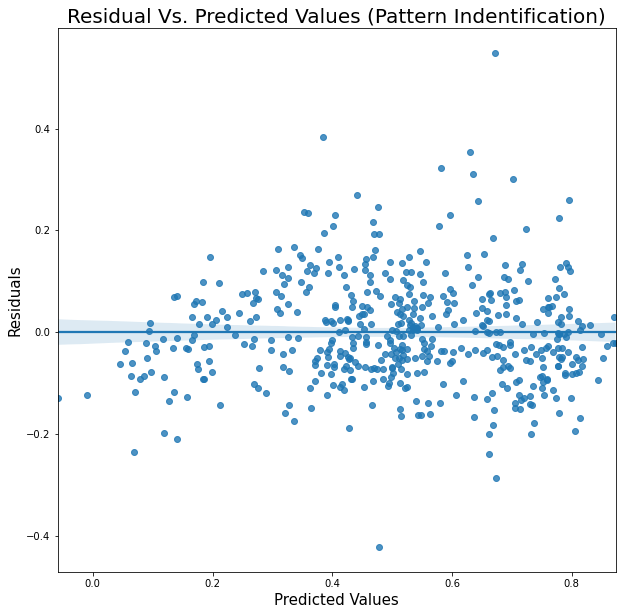

In [100]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

### 10.3. Homoscedasticity

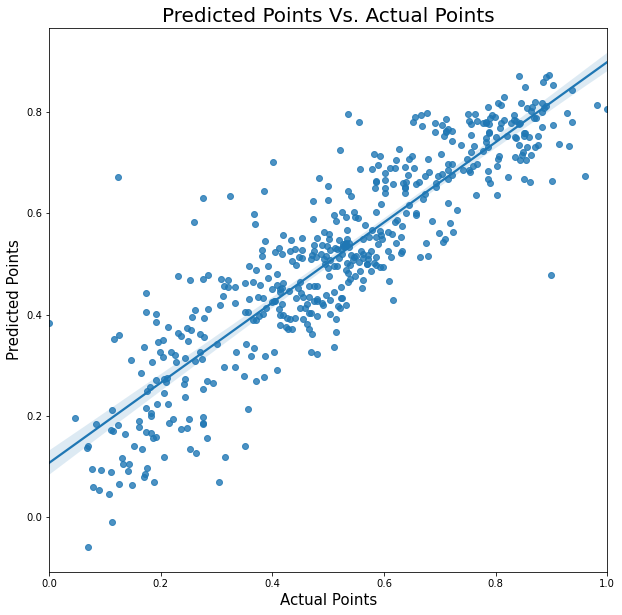

In [101]:
plt.figure(figsize = (10,10))

sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

#### Inference:
- From the above graph, we can say that residuals are equal distributed across predicted value.
- This means we see equal variance and we do NOT observe high concentration of data points in certain region & low conecentarion in certain regions.
- This prooves Homoscedasticity of Error Terms

### 10.4. Multicorrelation

#### We use VIF for checking the multicollinearity

In [102]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,windspeed,3.23
1,season_Spring,2.37
2,yr,1.74
3,season_Summer,1.70
4,mnth_January,1.62
5,weathersit_mist,1.48
6,mnth_November,1.23
7,mnth_September,1.16
8,mnth_December,1.13
9,weathersit_light,1.07


#### Inference:
- VIF < 5 indicates that there is low level of multi collinearity

## 11. Predicting on the Test data

In [103]:
df_test[num_variables] = scaler.transform(df_test[num_variables])
df_test.head(10)

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,...,season_Summer,season_Winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,
185,0.100000,0,1,0,0.831783,0.575080,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
536,0.633333,1,0,1,0.901354,0.516506,0.153728,0.712034,0,0,...,1,0,0,0,0,1,0,0,0,0
300,0.866667,0,0,0,0.511964,0.798722,0.334206,0.303382,0,0,...,0,1,0,1,0,0,0,0,0,1
222,0.300000,0,0,1,0.881625,0.301917,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
153,0.033333,0,0,0,0.817246,0.149627,0.537414,0.569029,0,0,...,1,0,0,1,0,0,0,0,0,0
405,0.266667,1,0,0,0.256524,0.478167,0.326196,0.438104,0,0,...,0,0,0,1,0,0,0,0,0,0
199,0.566667,0,0,1,0.856704,0.592119,0.372990,0.510354,0,0,...,0,0,0,0,0,0,0,1,0,0
172,0.666667,0,0,1,0.774672,0.744409,0.276724,0.553728,0,0,...,0,0,0,0,0,1,0,0,0,1
513,0.900000,1,1,0,0.814131,0.624068,0.331536,0.692706,0,0,...,1,0,0,0,0,0,1,0,0,0


### 11.1. Fixing the Test Target Variable

In [104]:
y_test = df_test.pop('cnt')

### 11.2. Fixing test variables

In [105]:
X_test = df_test

### 11.3. Filtering the Test Input dataset

In [106]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

### 11.4. Predicting on the test data using the developed model

In [107]:
y_pred = lr_model.predict(X_test_new)

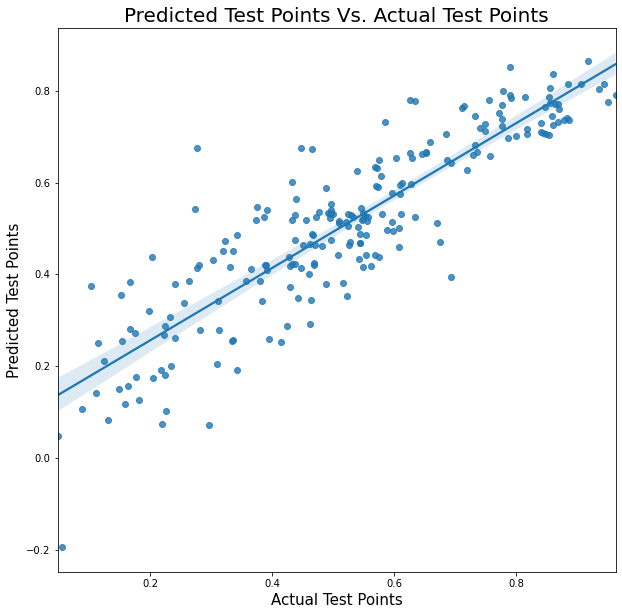

In [108]:
plt.figure(figsize = (10,10))

corr_plot = sns.regplot(x=y_test, y=y_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

#### Inference:
- The above plot shows linear relationship between the Actual Test data points and Predicted Test Data points

## 12. Generating the R-square for Test set

In [111]:
#### Generating r2_score for the train set

r2_score(y_train,y_train_pred)

0.7908315876126276

In [109]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7790839400465185

77.90 % of the dependent 'cnt' values can be explained by the independent variables of the model

## 13. Equation of the model

In [399]:
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     171.2
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.71e-161
Time:                        23:04:07   Log-Likelihood:                 437.88
No. Observations:                 510   AIC:                            -851.8
Df Residuals:                     498   BIC:                            -800.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5834      0.013     44.987      0.000       0.558       0.609
yr                   0.2459      0.009     26.646      0.000       0.228       0.264
holiday             -0.0854      0.030     -2.883      0.004      -0.144      -0.027
windspeed           -0.1910      0.029     -6.694      0.000      -0.247      -0.135
mnth_December       -0.1166      0.017     -6.689      0.000      -0.151      -0.082
mnth_January        -0.1216      0.020     -6.143      0.000      -0.160      -0.083
mnth_November       -0.1101      0.018     -6.120      0.000      -0.145      -0.075
mnth_September       0.0607      0.018      3.304      0.001       0.025       0.097
season_Spring       -0.2367      0.015    -16.212      0.000      -0.265      -0.208
season_Summer       -0.0374      0.013     -2.937      0.003      -0.062      -0.012
weathersit_light    -0.3155      0.028    -11.374      0.000      -0.370      -0.261
weathersit_mist     -0.0872      0.010     -8.883      0.000      -0.106      -0.068
==============================================================================
Omnibus:                       60.252   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.320
Skew:                          -0.619   Prob(JB):                     2.78e-32
Kurtosis:                       5.303   Cond. No.                         8.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The equation can be explained by:

- y = 0.5834 + 0.246 (b0) - 0.085 (b1) - 0.191(b2) - 0.1166(b3) - 0.1216(b4) - 0.110(b5) + 0.0607(b6) - 0.2367(b7) - 0.0374(b8) - 0.3155(b9) - 0.0872(b10)  